In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Cleaning and shit 

In [32]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn[1].csv')

df.columns = [col.strip() for col in df.columns]

df = df.replace(to_replace="?", value=np.NaN).dropna()

In [33]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [34]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3777-XROBG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [19]:
#unique values
print('Values in gender:', df.gender.unique())
print('Values in SeniorCitizen:',df.SeniorCitizen.unique())
print('Values in Partner:',df.Partner.unique())
print('Values in Dependents:',df.Dependents.unique())
print('Values in PhoneService:',df.PhoneService.unique())
print('Values in MultipleLines:',df.MultipleLines.unique())
print('Values in InternetService:',df.InternetService.unique())
print('Values in OnlineSecurity:', df.OnlineSecurity.unique())
print('Values in OnlineBackup:', df.OnlineBackup.unique())
print('Values in DeviceProtection:', df.DeviceProtection.unique())
print('Values in TechSupport:', df.TechSupport.unique())
print('Values in StreamingTV:', df.StreamingTV.unique())
print('Values in StreamingMovies:', df.StreamingMovies.unique())
print('Values in Contract:', df.Contract.unique())
print('Values in PaperlessBilling:', df.PaperlessBilling.unique())
print('Values in PaymentMethod:', df.PaymentMethod.unique())
print('Values in Churn:', df.Churn.unique())

Values in gender: ['Female' 'Male']
Values in SeniorCitizen: [0 1]
Values in Partner: ['Yes' 'No']
Values in Dependents: ['No' 'Yes']
Values in PhoneService: ['No' 'Yes']
Values in MultipleLines: ['No phone service' 'No' 'Yes']
Values in InternetService: ['DSL' 'Fiber optic' 'No']
Values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Values in OnlineBackup: ['Yes' 'No' 'No internet service']
Values in DeviceProtection: ['No' 'Yes' 'No internet service']
Values in TechSupport: ['No' 'Yes' 'No internet service']
Values in StreamingTV: ['No' 'Yes' 'No internet service']
Values in StreamingMovies: ['No' 'Yes' 'No internet service']
Values in Contract: ['Month-to-month' 'One year' 'Two year']
Values in PaperlessBilling: ['Yes' 'No']
Values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Values in Churn: ['No' 'Yes']


In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Further cleaning 

In [21]:
#customers with zeros for total charge 
total_charges = df[df.TotalCharges == " "]
total_charges.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [22]:
#finding zeros for tenure-total charge
new_customers = df[df.tenure == 0]
total_charges == new_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
753,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
936,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1082,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1340,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3331,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3826,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4380,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5218,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6670,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


##### converting the null values for total charges into a numeric 

In [37]:
df.loc[df['TotalCharges'] == " ", 'TotalCharges'] = '0'

In [38]:
df.loc[cleaned_df['TotalCharges'] == " ", 'TotalCharges'] = '0'

In [40]:
# checking for duplicated rows and also customers 
dups = df[df.duplicated() == True].count()


dups_id = df['customerID'][df['customerID'].duplicated() == True].count()

### Data Analysis

In [41]:
#checking for churn///27% have churned 
pd.DataFrame(df.groupby('Churn')['customerID'].count()).apply(lambda x : x / sum(x) * 100)

,customerID
Churn,
No,73.463013
Yes,26.536987


### Catagorical Data with Vis.

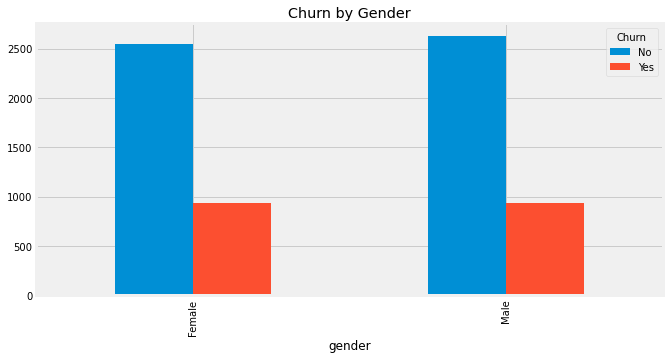

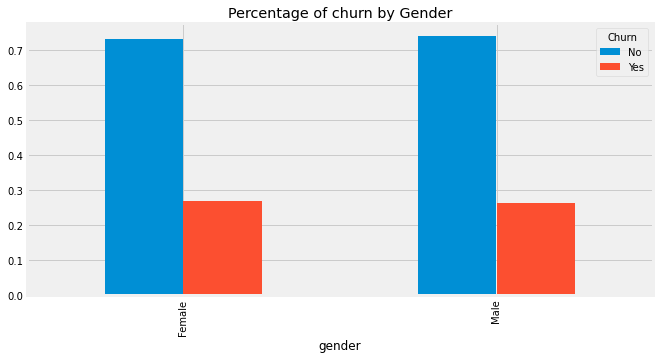

In [42]:
# churn by gender---pretty much 50/50 wont use as predictor 
gender = df.groupby('gender')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
gender.set_title("Churn by Gender")
plt.show()
gender_pct = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
gender_pct.set_title("Percentage of churn by Gender")
plt.show()

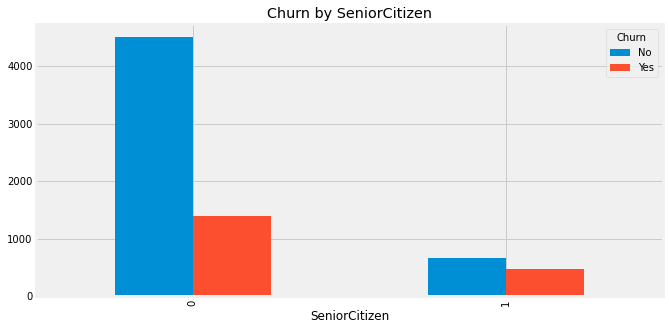

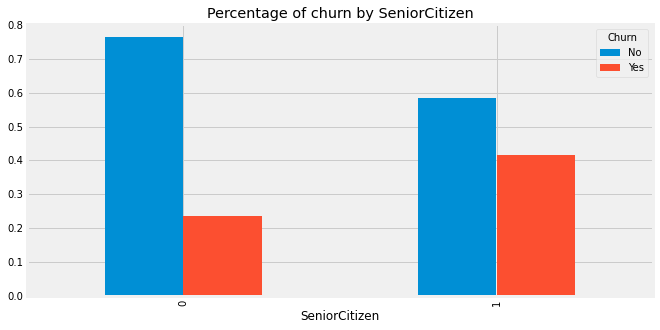

In [43]:
# churn by senior citizens ---- 42% of seniors churn compared to the 24% average 
senior = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
senior.set_title("Churn by SeniorCitizen")
plt.show()
senior_pct = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
senior_pct.set_title("Percentage of churn by SeniorCitizen")
plt.show()

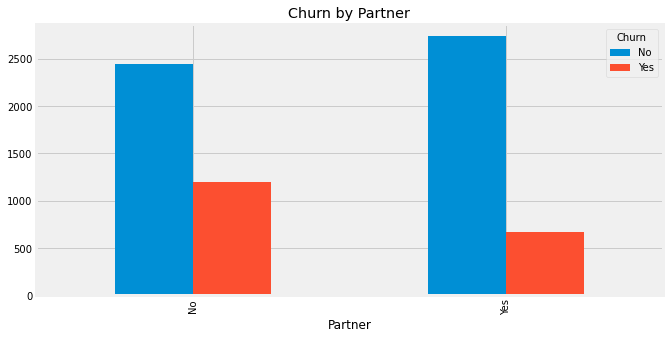

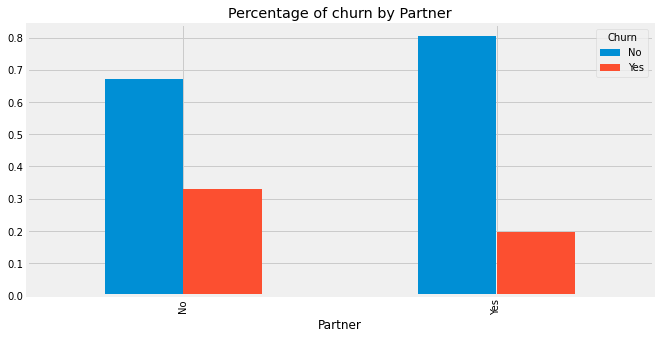

In [44]:
#33% of single people churn. only 20% of people with partners churn 
partner = df.groupby('Partner')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
partner.set_title("Churn by Partner")
plt.show()
partner_pct = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
partner_pct.set_title("Percentage of churn by Partner")
plt.show()

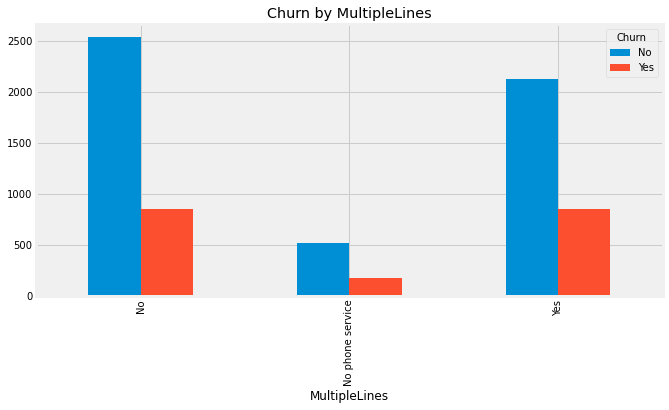

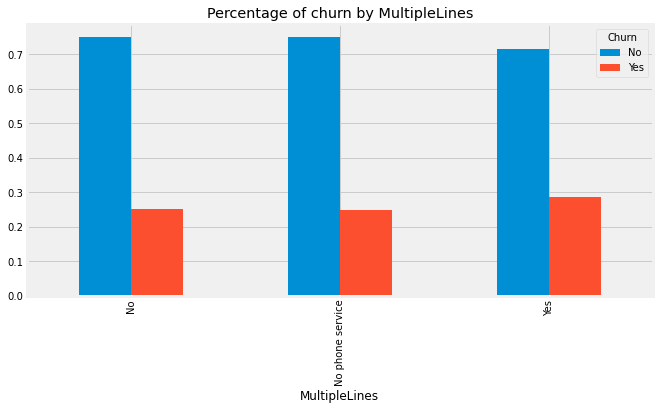

In [46]:
#not a big difference between the three. But, those with multiple lines do have a churn of 29% compared to 25%.
mplines = df.groupby('MultipleLines')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("Churn by MultipleLines")
plt.show()
mplines_pct = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of churn by MultipleLines")
plt.show()


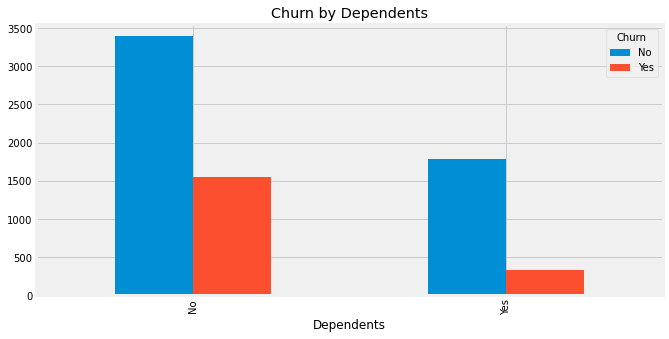

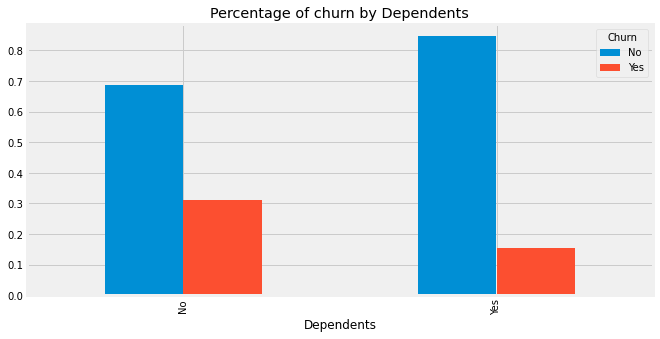

In [47]:
#Those with no dependents have a churn rate of 31% while those with dependents have one that is 16%
dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
dependents.set_title("Churn by Dependents")
plt.show()
dependents_pct = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
dependents_pct.set_title("Percentage of churn by Dependents")
plt.show()

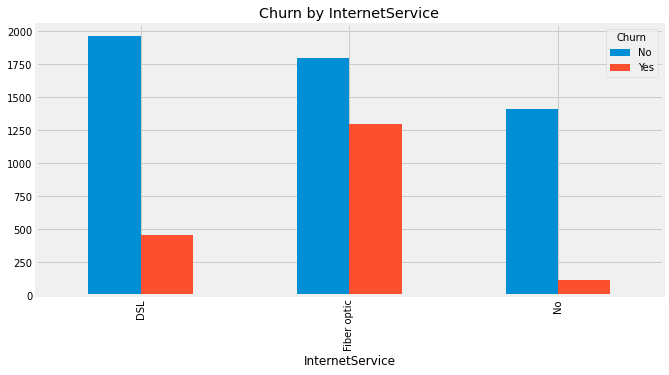

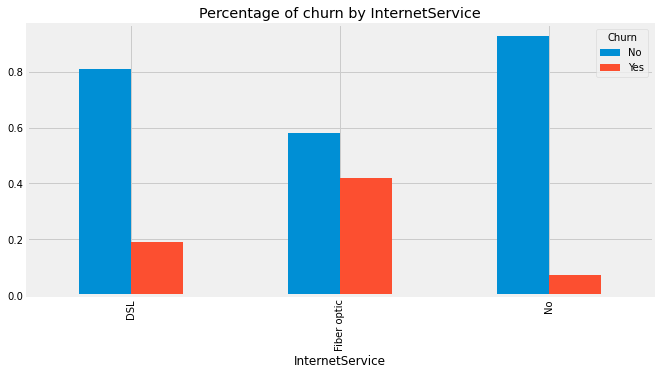

In [48]:
#DSL is at a 19% churn. Fiber Optic is at a 41% churn. Then those without have a 7% churn. 
internet = df.groupby('InternetService')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
internet.set_title("Churn by InternetService")
plt.show()
internet_pct = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
internet_pct.set_title("Percentage of churn by InternetService")
plt.show()

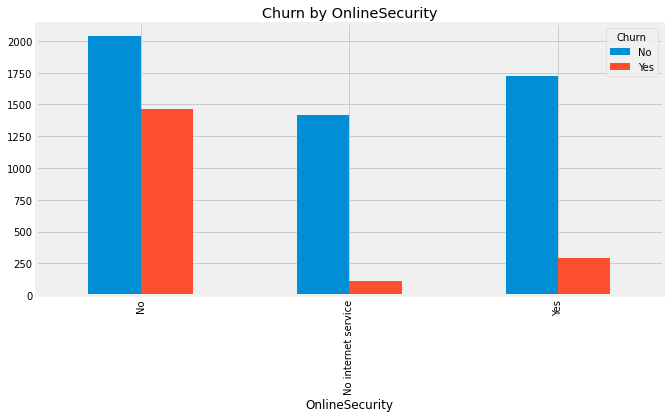

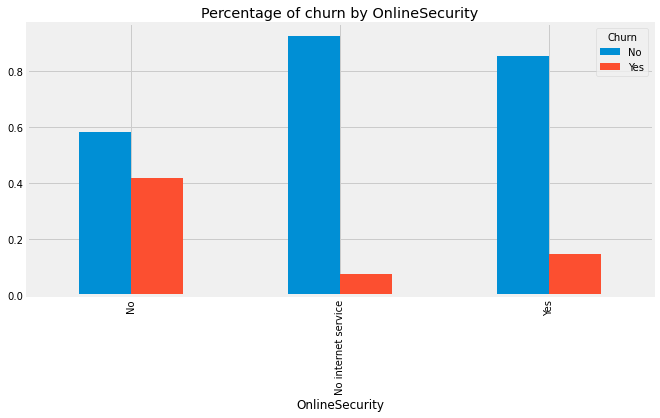

In [49]:
#None is a 42% churn, No internet is 7% churn, and yes is a 15% churn. 
security = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
security.set_title("Churn by OnlineSecurity")
plt.show()
security_pct = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
security_pct.set_title("Percentage of churn by OnlineSecurity")
plt.show()

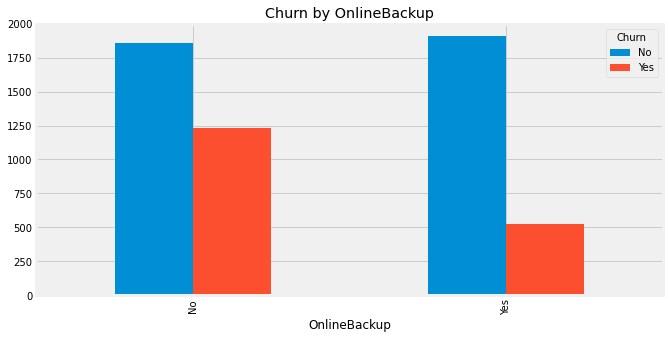

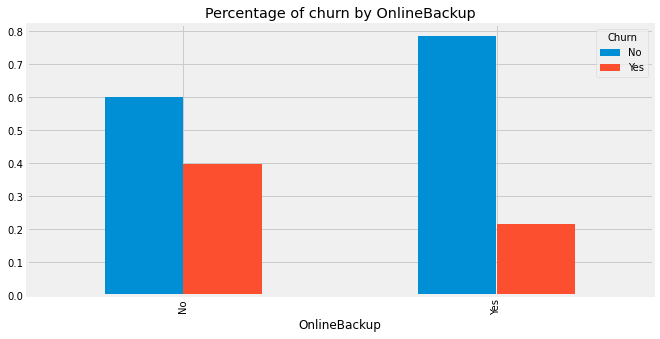

In [50]:
#people with no backup are 44% of all the data, while those with backup represent 27%. The rest is people without internet. 
#Those without backup have a churn of 40%, while those with backup have a churn of 22%. 
backup = df[df['OnlineBackup'] != 'No internet service'].groupby('OnlineBackup')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
backup.set_title("Churn by OnlineBackup")
plt.show()
backup_pct = df[df['OnlineBackup'] != 'No internet service'].groupby('OnlineBackup')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
backup_pct.set_title("Percentage of churn by OnlineBackup")
plt.show()

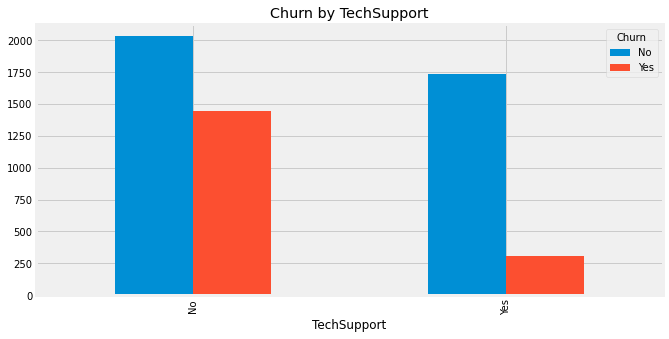

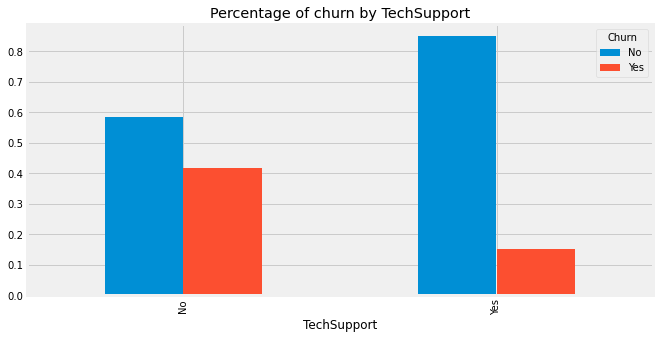

In [51]:
# Customers without a tech support represent almost half (49%) of the total customers while the ones with tech support represent 
# 29% of the total customers (the rest being customers without internet service).
#-----The churn without techsupport is 41% while the people with tech support have a churn of 15%
support = df[df['TechSupport'] != 'No internet service'].groupby('TechSupport')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
support.set_title("Churn by TechSupport")
plt.show()
support_pct = df[df['TechSupport'] != 'No internet service'].groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
support_pct.set_title("Percentage of churn by TechSupport")
plt.show()